In [4]:
import numpy as np 
from scipy import linalg
import matplotlib.pyplot as plt
from pde import BlackScholesPDESolver, payoff_call, payoff_put

### Unit Test

In [5]:
from scipy.stats import norm

def black_scholes_european_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def black_scholes_european_put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


In [6]:
def test_european_call_option():
    S0 = 100
    Smax = 1000
    K = 100
    T = 1.0
    r = 0.05
    q = 0.0
    sigma = 0.2
    M = 1000
    N = 1000
    
    bs_class = BlackScholesPDESolver(S0,Smax, K, T, r, q, sigma, M, N)
    
    numerical_result = bs_class.get_val(payoff_call, "call", "european")

    analytical_result = black_scholes_european_call(S0, K, T, r, sigma)
    
    print("numerical_result:", numerical_result)
    print("analytical_result:", analytical_result)
 
    # Check if the numerical result is close to the analytical result
    assert np.isclose(numerical_result, analytical_result, rtol=1e-2)

test_european_call_option()


numerical_result: 10.447062328197644
analytical_result: 10.450583572185565


In [7]:
def test_european_call_option():
    S0 = 100
    Smax = 1000
    K = 100
    T = 1.0
    r = 0.05
    q = 0.0
    sigma = 0.2
    M = 1000
    N = 1000
    
    bs_class = BlackScholesPDESolver(S0,Smax, K, T, r, q, sigma, M, N)
    
    numerical_result = bs_class.get_val(payoff_put, "put", "european")

    analytical_result = black_scholes_european_put(S0, K, T, r, sigma)
    
    print("numerical_result:", numerical_result)
    print("analytical_result:", analytical_result)

    # Check if the numerical result is close to the analytical result
    assert np.isclose(numerical_result, analytical_result, rtol=1e-2)

test_european_call_option()


numerical_result: 5.570123678057813
analytical_result: 5.573526022256971


### Surface Plot

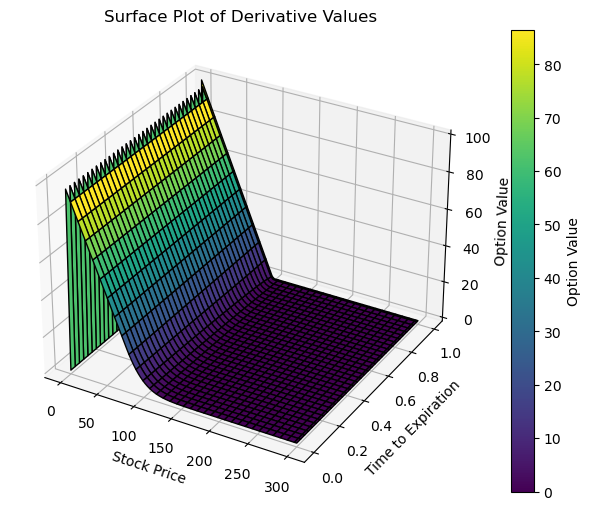

In [8]:
from mpl_toolkits.mplot3d import Axes3D

S0 = 100
Smax = 300
K = 100
T = 1.0
r = 0.05
q = 0.02
sigma = 0.2
M = 100
N = 100

bs_solver = BlackScholesPDESolver(S0, Smax, K, T, r, q, sigma, M, N)

derivative_values = bs_solver.get_val(payoff_put, "put", "american")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the meshgrid for the surface plot
S_values, t_values = np.meshgrid(bs_solver.grid_S, np.linspace(0, T, N+1))

surf = ax.plot_surface(S_values, t_values, bs_solver.F.T, cmap='viridis', edgecolor='k')

ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('Option Value')
ax.set_title('Surface Plot of Derivative Values')
fig.colorbar(surf, ax=ax, label='Option Value')

plt.show()


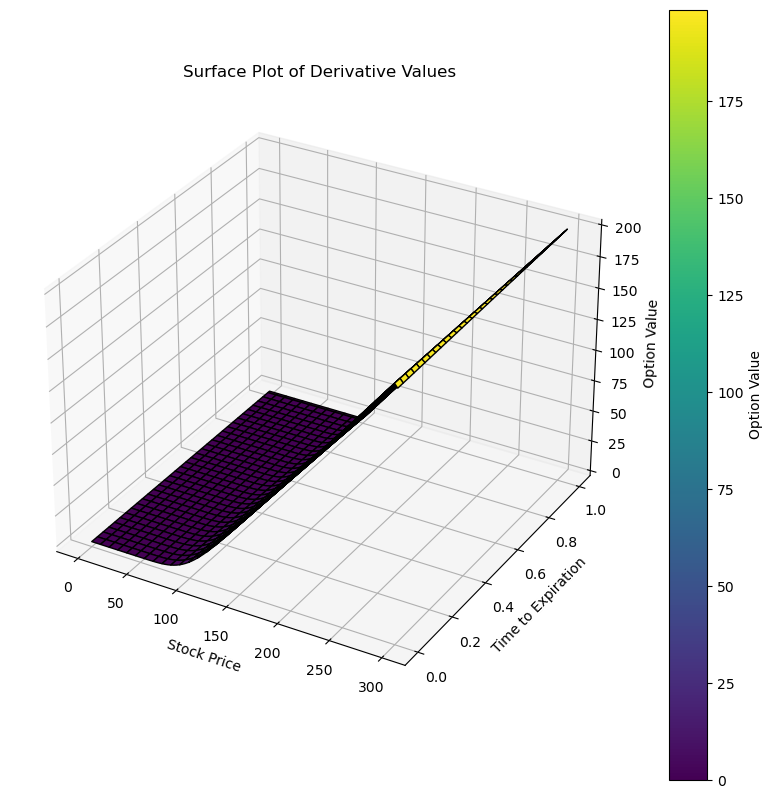

In [13]:
from mpl_toolkits.mplot3d import Axes3D

S0 = 100
Smax = 300
K = 100
T = 1.0
r = 0.05
q = 0.02
sigma = 0.2
M = 100
N = 100

bs_solver = BlackScholesPDESolver(S0, Smax, K, T, r, q, sigma, M, N)

derivative_values = bs_solver.get_val(payoff_call, "call", "american")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Create the meshgrid for the surface plot
S_values, t_values = np.meshgrid(bs_solver.grid_S, np.linspace(0, T, N+1))

surf = ax.plot_surface(S_values, t_values, bs_solver.F.T, cmap='viridis', edgecolor='k')

ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiration')
ax.set_zlabel('Option Value')
ax.set_title('Surface Plot of Derivative Values')
fig.colorbar(surf, ax=ax, label='Option Value')

plt.show()